# Laboratorio 1 Aprendizaje de Máquina

Integrantes del grupo:
1. Emmanuel Blanco - 202312743
2. Juan David Guzmán - 202320890

## Exploración de Datos

Para poder hacer la exploración de los datos primero importamos todas la librerías que nos pueden resultar útiles:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#TODO: Incluir importaciones necesarias de scikit-learn aquí
#from sklearn.preprocessing import 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

A continuación incluimos las versiones de las librerías que empleamos:

In [4]:
from importlib.metadata import version
print(f"Versión de Pandas: {version('pandas')}")
print(f"Versión de Matplotlib: {version('matplotlib')}")
print(f"Versión de Seaborn: {version('seaborn')}")
print(f"Versión de Scikit learn: {version('scikit-learn')}")

Versión de Pandas: 2.2.3
Versión de Matplotlib: 3.10.0
Versión de Seaborn: 0.13.2
Versión de Scikit learn: 1.6.1


En el siguiente espacio para código desplegamos la información contenida en el diccionario de datos para informanos sobre lo que contienen los datos

In [5]:
#Cargamos en diccionario de datos
dict_datos = pd.read_excel("./data/DiccPacientes.xlsx")
pd.set_option('display.max_colwidth', None)
dict_datos

,Nombre Columna,Tipo de dato,Comentarios
0,Patient ID,String,Identificador del paciente
1,Date of Service,Date,Fecha de la atención
2,Sex,String,"Sexo (Femenino, Masculino)"
3,Age,Integer,Edad
4,Weight (kg),Float,Peso
5,Height (m),Float,Altura
6,BMI,Float,Índice de masa corporal
7,Abdominal Circumference (cm),Float,Circunferencia abdominal
8,Blood Pressure (mmHg),String,"Presión sanguínea, de la forma ""<Presión arterial sistólica>/<Presión arterial diastólica>"""
9,Total Cholesterol (mg/dL),Float,Colesterol total


Ahora pasamos a cargar los datos de prueba dentro de un dataframe para poder revisarlos e identificar detalles que debamos corregir o preparar para luego pasárselos al modelo

In [23]:
training_data = pd.read_csv("./data/Datos_Lab_1.csv")
training_data

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,...,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,12/04/2022,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,...,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1636,ePpS4710,12/04/2022,M,48.0,50.100,1.770,16.000,104.100,146/95,210.0,...,Low,Y,177.000,0.588,146.0,NaN,Hypertension Stage 2,110.0,NaN,HIGH
1637,QSFT6794,"September 06, 2025",M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,...,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


Tamaño del dataframe:

In [24]:
print(training_data.shape)

(1639, 24)


ADICIONAL NUESTRO:

In [ ]:

print(f"Número de registros: {train_data.shape[0]}")
print(f"Número de variables: {train_data.shape[1]}")

Tipo de los datos de las columnas de nuestro dataframe

In [25]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   object 
 1   Date of Service               1639 non-null   object 
 2   Sex                           1639 non-null   object 
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   object 
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Smoking Status                1639 non-null   object 
 13  Dia

Descripción de los datos

In [26]:
training_data.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000


En la columna edad el mínimo y el máximo aparecen como decimales, pero el diccionario los describe como enteros. Habría que revisar si hay otros datos similares.

En mínimo en el colesterol total es negativo, podría no ser válido.

Los mínimos de Estimated LDL y CVD Risk Score también son negativos, posiblemente no sean válidos

Podemos ver que el conteo de algunas columnas resulta distinta de 1639, lo que indica falta de datos en algunas columnas. Con base en eso ejecutamos la siguiente instrucción:

In [27]:
((training_data.isnull().sum()/training_data.shape[0])).sort_values(ascending=False)

Diastolic BP                    0.051861
HDL (mg/dL)                     0.050031
Waist-to-Height Ratio           0.046370
Weight (kg)                     0.044539
Total Cholesterol (mg/dL)       0.041489
Age                             0.041489
Height (cm)                     0.041489
Height (m)                      0.037218
Abdominal Circumference (cm)    0.037218
Systolic BP                     0.037218
Estimated LDL (mg/dL)           0.034777
Fasting Blood Sugar (mg/dL)     0.032947
BMI                             0.032337
CVD Risk Score                  0.017694
Sex                             0.000000
Patient ID                      0.000000
Date of Service                 0.000000
Family History of CVD           0.000000
Diabetes Status                 0.000000
Smoking Status                  0.000000
Blood Pressure (mmHg)           0.000000
Physical Activity Level         0.000000
Blood Pressure Category         0.000000
CVD Risk Level                  0.000000
dtype: float64

Hacen falta datos en las columnas Age, Weight, HDL, BMI, Height, Abdominal Circumference, Height (cm), Waist-to-Height ratio, Total Cholesterol, Systolic BP, Diastolic BP, Estimated LDL, Fasting Blood Sugar y CVD Risk Score

In [28]:
# Filtrar filas con Calificación nula
nulos_age = training_data[training_data['Age'].isna()].copy()
nulos_weight = training_data[training_data["Weight (kg)"].isna()].copy()
nulos_HDL = training_data[training_data["HDL (mg/dL)"].isna()].copy()
nulos_BMI = training_data[training_data["BMI"].isna()].copy()
nulos_height_m = training_data[training_data["Height (m)"].isna()].copy()
nulos_abdmomin = training_data[training_data["Abdominal Circumference (cm)"].isna()].copy()
nulos_height_cm = training_data[training_data["Height (cm)"].isna()].copy()
nulos_w_h_ratio = training_data[training_data["Waist-to-Height Ratio"].isna()].copy()
nulos_colest = training_data[training_data["Total Cholesterol (mg/dL)"].isna()].copy()
nulos_systolic = training_data[training_data["Systolic BP"].isna()].copy()
nulos_blood_sugar = training_data[training_data["Fasting Blood Sugar (mg/dL)"].isna()].copy()
nulos_estimated_LDL = training_data[training_data["Estimated LDL (mg/dL)"].isna()].copy()
nulos_CVD_risk_score = training_data[training_data["CVD Risk Score"].isna()].copy()

# Contar cuántas son
print(f"Filas con Age nula: {nulos_age.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Age"].isna()]}")
print(f"Filas con Weight nula: {nulos_weight.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Weight (kg)"].isna()]}")
print(f"Filas con HDL nula: {nulos_HDL.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["HDL (mg/dL)"].isna()]}")
print(f"Filas con BMI nula: {nulos_BMI.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["BMI"].isna()]}")
print(f"Filas con Height (m) nula: {nulos_height_m.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Height (m)"].isna()]}")
print(f"Filas con Abdominal Circum nula: {nulos_abdmomin.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Abdominal Circumference (cm)"].isna()]}")
print(f"Filas con height (cm) nula: {nulos_height_cm.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Height (cm)"].isna()]}")
print(f"Filas con Waist-height ratio nula: {nulos_w_h_ratio.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Waist-to-Height Ratio"].isna()]}")
print(f"Filas con Total Cholest nula: {nulos_colest.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Total Cholesterol (mg/dL)"].isna()]}")
print(f"Filas con Systolic nula: {nulos_systolic.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Systolic BP"].isna()]}")
print(f"Filas con Blood Sugar nula: {nulos_blood_sugar.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Fasting Blood Sugar (mg/dL)"].isna()]}")
print(f"Filas con Estimated LDL nula: {nulos_estimated_LDL.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["Estimated LDL (mg/dL)"].isna()]}")
print(f"Filas con CVD risk score nula: {nulos_CVD_risk_score.shape[0]}")
print(f"Filas afectadas: {training_data.index[training_data["CVD Risk Score"].isna()]}")

Filas con Age nula: 68
Filas afectadas: Index([   2,   16,   21,   47,   49,   84,   85,  104,  126,  155,  165,  179,
        201,  226,  277,  307,  316,  354,  372,  451,  460,  533,  535,  540,
        595,  598,  604,  616,  652,  659,  714,  737,  760,  779,  784,  792,
        809,  879,  921,  958,  970,  984, 1043, 1045, 1052, 1058, 1068, 1090,
       1098, 1101, 1120, 1125, 1264, 1269, 1355, 1369, 1400, 1445, 1483, 1484,
       1495, 1531, 1595, 1605, 1608, 1621, 1624, 1638],
      dtype='int64')
Filas con Weight nula: 73
Filas afectadas: Index([  12,   74,   80,  105,  132,  136,  149,  161,  164,  227,  251,  270,
        342,  356,  365,  374,  432,  517,  522,  556,  579,  629,  641,  650,
        656,  660,  661,  681,  688,  728,  754,  774,  907,  914,  937,  940,
        951,  959,  960,  977,  994, 1015, 1019, 1059, 1067, 1099, 1105, 1139,
       1157, 1244, 1285, 1293, 1294, 1332, 1350, 1371, 1384, 1388, 1405, 1433,
       1447, 1464, 1470, 1474, 1490, 1492, 1495, 1

Revisamos si hay ids duplicados en nuestros datos:

In [29]:
# ids duplicados
dup_counts = (training_data["Patient ID"].value_counts()
                        .loc[lambda s: s > 1]
                        .sort_values(ascending=False))
for id_, n in dup_counts.items():
    print(f"Id={id_} → {n} apariciones")

if dup_counts.sum() == 0:
    print("No hay duplicados")

Id=AhYt1346 → 3 apariciones
Id=RlsB8509 → 3 apariciones
Id=RwGu5647 → 3 apariciones
Id=dJuC5084 → 3 apariciones
Id=YLCe2926 → 3 apariciones
Id=dSiv4949 → 3 apariciones
Id=pEpZ9034 → 3 apariciones
Id=STpP5810 → 3 apariciones
Id=DhUJ7239 → 3 apariciones
Id=gdBF9655 → 3 apariciones
Id=INdI1482 → 3 apariciones
Id=lqUc7918 → 3 apariciones
Id=CDsa2651 → 3 apariciones
Id=FTEC4446 → 3 apariciones
Id=xbYu9929 → 3 apariciones
Id=cUUw7860 → 3 apariciones
Id=XUjh9519 → 3 apariciones
Id=miQs7675 → 3 apariciones
Id=fHqx3420 → 3 apariciones
Id=svjU9851 → 3 apariciones
Id=FnQr5343 → 3 apariciones
Id=dNyM1057 → 3 apariciones
Id=kajW6905 → 3 apariciones
Id=DxSq2036 → 3 apariciones
Id=ZDBx7052 → 3 apariciones
Id=Uinq3357 → 3 apariciones
Id=UIWC3599 → 3 apariciones
Id=NGwd5164 → 3 apariciones
Id=GPCF6283 → 3 apariciones
Id=xFVW5778 → 3 apariciones
Id=KiRC8867 → 3 apariciones
Id=CYeS2965 → 3 apariciones
Id=KXhc1181 → 3 apariciones
Id=HVVR3121 → 3 apariciones
Id=kijK0146 → 3 apariciones
Id=Uexs7461 → 3 apar

Ahora vemos en detalle las filas con ids repetidos:

In [30]:
# Detalle de los registros
dup_table = (
    training_data[training_data['Patient ID'].duplicated(keep=False)]
    .copy()
    .assign(repeticiones=training_data.groupby('Patient ID')['Patient ID'].transform('size'))
    .sort_values(['repeticiones', 'Patient ID'], ascending=[False, True])
)
# Mostrar tabla
dup_table

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level,repeticiones
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH,3
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW,3
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,29.833,LOW,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,yvsn3005,28 Oct 20,F,60.0,54.300,1.810,16.600,99.1,133/65,187.0,...,N,181.000,0.548,133.0,65.0,Hypertension Stage 1,79.0,15.710,INTERMEDIARY,2
95,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
375,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
799,zxhX5525,"November 13, 2021",M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH,2


Se puede ver que en las repeticiones no hay cambios en ninguno de los campos, por lo que no tiene sentido tener estas columnas repetidas

Ahora revisaremos el formato de las fechas:

In [31]:
training_data.loc[:10,"Date of Service"]

0     November 08, 2023
1            20/03/2024
2            2021-05-27
3        April 18, 2022
4            01/11/2024
5             25 Mar 24
6             22 May 25
7      October 26, 2023
8            15/12/2023
9      January 16, 2022
10            18 Jun 23
Name: Date of Service, dtype: object

Tan solo con mirar los 10 primeros datos vemos que el formato de las fechas no está unificado. Quizá sea útil unificar este formato a pesar de que la fecha no pueda resultar útil en la regresión.

Ahora pintaremos un mapa de calor para ver como se relacionan las distintas variables:

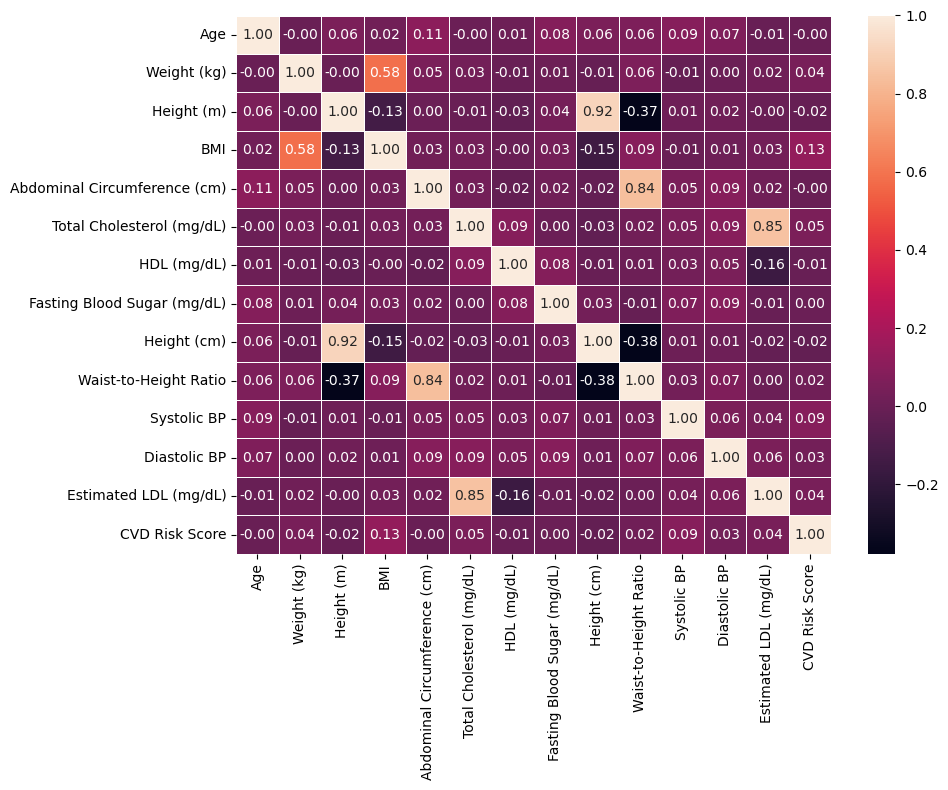

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(training_data.corr(numeric_only=True), annot=True, fmt=".2f", annot_kws={"size": 10},linewidths=0.5)
plt.tight_layout()
plt.show()


De acuerdo con lo que nos muestra este heatmap la variables que no nos resultan relevantes considerar son Age, Abdominal Circumference y Fasting Blood Sugar.

Por otro lado las variables que nos pueden interesar son Weight, BMI, Total Cholesterol, Systolic BP y Estimated LDL pues muestran mayor relación con nuestra variable de interés CVD Score. 

Estas variables tiene correlaciones fuertes con otras variables:
- Weight y BMI: 0.58
- BMI y Height (m): -0.15
- BMI y Height (cm): -0.13
- Total Cholesterol y Estimated LDL: 0.85
- Estimated LDL y HDL: -0.16

Y entre ellas su correlación es:
- Weight y BMI: 0.58
- Weight y Total Cholesterol: 0.03
- Weight y Systolic BP: -0.01
- Weight y Estimated LDL: 0.02
- BMI y Total Cholesterol: 0.03
- BMI y Systolic BP: -0.01
- BMI y Estimated LDL: 0.03
- Total Cholesterol y Systolic BP: 0.05
- Total Cholesterol y Estimated LDL: 0.85
- Systolic BP y Estimated LDL: 0.04

Ahora veremos como se relacionan los datos de las variables que identificamos antes con los de nuestra variable de interés:

<Axes: xlabel='Estimated LDL (mg/dL)', ylabel='CVD Risk Score'>

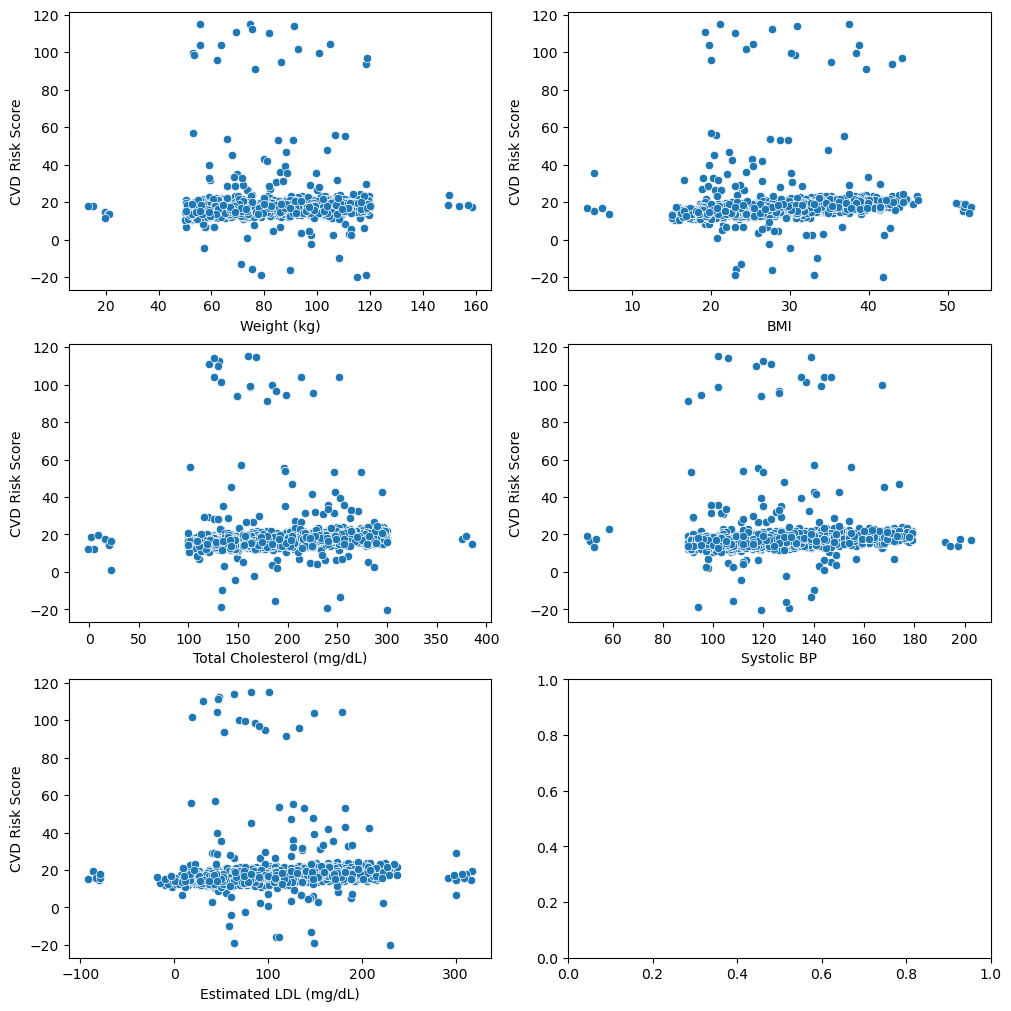

In [60]:
fig, ax = plt.subplots(3,2,layout="constrained",figsize=(10,10))
#Weight y CVD Score
sns.scatterplot(training_data,x="Weight (kg)",y="CVD Risk Score",ax=ax[0][0])
#BMI y CVD Risk Score
sns.scatterplot(training_data,x="BMI",y="CVD Risk Score",ax=ax[0][1])
#Total Cholesterol y CVD Risk Score
sns.scatterplot(training_data,x="Total Cholesterol (mg/dL)",y="CVD Risk Score",ax=ax[1][0])
#Systolic BP y CVD Score
sns.scatterplot(training_data,x="Systolic BP",y="CVD Risk Score",ax=ax[1][1])
#Estimated LDL y CVD Score
sns.scatterplot(training_data,x="Estimated LDL (mg/dL)",y="CVD Risk Score",ax=ax[2][0])

## Preparación de datos

1. En este caso se eliminan las filas duplicadas del DataFrame `training_data` basándonos en la columna "Patient ID" (ID del paciente) y conservando solo la primera aparición para garantizar que los registros de los pacientes sean únicos. Pero para hacer eso se usara el metodo drop_duplicates() del DataFrame `training_data`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

training_data = pd.read_csv("Datos_Lab_1.csv")
training_data = training_data.drop_duplicates(subset=['Patient ID'], keep='first')
print(f"New DataFrame shape after removing duplicates: {training_data.shape}")

2. Procedemos a convertir la columna «Date of Service» a un formato de fecha y hora coherente y que tambien gestione cualquier fecha futura potencial ajustándola a la fecha actual. Para garantizar un formato de fecha coherente y gestionar las fechas futuras, se transformara la columna "Date of Service" en objetos que serian dde fecha y hora, cambiando los errores a NaT, obtendremos pues la fecha actual y, por ultimo, se opto por sustituir cualquier fecha futura por la fecha actual.

In [ ]:
training_data['Date of Service'] = pd.to_datetime(training_data['Date of Service'], errors='coerce')
current_date = pd.Timestamp.now().normalize()

training_data.loc[training_data['Date of Service'] > current_date, 'Date of Service'] = current_date
print("Columna Fecha del servicio convertida a fecha y hora, y fechas futuras ajustadas a la fecha actual") print(f"Primeras 5 filas de 'Fecha del servicio' después de la conversión y el ajuste:\n{training_data['Date of Service'].head()}")
print(f"Número de valores NaT que obtenemos después de la conversión: {training_data['Date of Service'].isnull().sum()}")

Bueno como se ve no todo es color de rosa pues en el paso anterior convirtió correctamente la columna "Date of Service" en objetos de fecha y hora y se limitó las fechas futuras, pero un número significativo de valores dio como resultado NaT. 

Esto nos indica que muchas cadenas de fecha no tenían un formato reconocible.

Lo que se tendria que hacer es imputar estas fechas que faltan (NaT). Una estrategia razonable en este caso en especifico es rellenarlas con la moda de la columna Fecha del servicio, ya que representa la fecha más frecuente.

In [ ]:
moda_fecha_serv = training_data['Date of Service'].mode()[0]
training_data['Date of Service'].fillna(moda_fecha_serv, inplace=True)

print(f"Fechas faltantes rellenadas con la moda: {moda_fecha_serv}")
print(f"Valor numerico NaT después de la imputacion: {training_data['Date of Service'].isnull().sum()}")
print(f"Primeras 5 filas de 'Fecha del servicio' después de la imputacion:\n{training_data['Date of Service'].head()}")

El código nos generaba una advertencia FutureWarning debido al uso de inplace=True con asignación encadenada, tenemos que reasignar directamente el resultado de la operación fillna a la columna. Lo hacemos pues seria la práctica recomendada para las versiones 3.0 y superiores de pandas.(segun las fuentes de internet para este error)

In [ ]:
moda_fecha_serv = training_data['Date of Service'].mode()[0]
training_data['Date of Service'] = training_data['Date of Service'].fillna(moda_fecha_serv)

print(f"Fechas faltantes rellenadas con la moda: {moda_fecha_serv}")
print(f"Valor numerico NaT después de la imputacion: {training_data['Date of Service'].isnull().sum()}")
print(f"Primeras 5 filas de 'Fecha del servicio' después de la imputacion:\n{training_data['Date of Service'].head()}")

3. Para el tercer paso sería correjir los valores numéricos inconsistentes convirtiendo Edad a tipo entero y sustituyendo los valores negativos en Colesterol total (mg/dL), LDL estimado (mg/dL) y Puntuación de riesgo de ECV por NaN.

En primer lugar, aunque se haya identificado atras como una variable no necesaria igual se ve la necesidad  de que la columna Edad, que, a pesar de ser de tipo entero, contiene valores decimales, se convierta correctamente a un formato entero nulo para dar cabida a posibles valores faltantes. Luego, tal como se identificó en la exploración de datos, columnas como Colesterol total (mg/dL), LDL estimado (mg/dL) y Puntuación de riesgo de ECV contienen valores negativos no válidos, que deben reemplazarse por NaN para reflejar su inconsistencia y prepararlos para su manejo adecuado en los pasos posteriores.

In [ ]:
import numpy as np

training_data['Age'] = pd.to_numeric(training_data['Age'], errors='coerce')
training_data['Age'] = training_data['Age'].apply(np.floor).astype(pd.Int64Dtype())
training_data.loc[training_data['Total Cholesterol (mg/dL)'] < 0, 'Total Cholesterol (mg/dL)'] = np.nan
training_data.loc[training_data['Estimated LDL (mg/dL)'] < 0, 'Estimated LDL (mg/dL)'] = np.nan
training_data.loc[training_data['CVD Risk Score'] < 0, 'CVD Risk Score'] = np.nan

print("Valores numéricos inconsistentes que fueron corregidos:")
print(f"'Age': {training_data['Age'].dtype}")
print(f"Valores negativos en 'Total Cholesterol (mg/dL)' remp: {training_data['Total Cholesterol (mg/dL)'].isnull().sum() - training_data['Total Cholesterol (mg/dL)'].count()} new NaNs")
print(f"Valores negativos en 'Estimated LDL (mg/dL)' remp: {training_data['Estimated LDL (mg/dL)'].isnull().sum() - training_data['Estimated LDL (mg/dL)'].count()} new NaNs")
print(f"Valores negativos en 'CVD Risk Score' remp: {training_data['CVD Risk Score'].isnull().sum() - training_data['CVD Risk Score'].count()} new NaNs")

En el anterior segmento de codigo se presentaron errores hasta por los codos. Aperecia un fallo en la columna «Edad» por un error en su compatibilidad en tipos, entonces toco investigar e implementar un proceso de limpieza en dos etapas: primero, se utilizó pd.to_numeric con errors='coerce' para transformar cualquier carácter no numérico en NaN, eliminando facilmente las inconsistencias de tipo objeto. Posteriormente, a la transformacion molestaba entonces por valores decimales o valores float (como 6.134) los cuales impedian la conversión directa a pd.Int64Dtype() debido a un TypeError, se aplicó np.floor para redondear estos valores al entero inferior más cercano por facilidad de transformación. Este preprocesamiento aplicado nos permitio asegura que los datos sean numéricos y compatibles con el formato de enteros con soporte para nulos de Pandas, garantizando una conversión sin errores que es lo que más importa en este caso en particular.

4. Aunque no necesario, eliminaremos la columna Altura (cm), ya que la columna Altura (m) ya existe y proporciona la misma información, evitando así la redundancia, utilizando el metodo drop() con axis=1, especificando pues la eliminacion de columna.

In [ ]:
training_data = training_data.drop('Height (cm)', axis=1)
print("actualizacion de tabla sin 'Height (cm)':")
print(training_data.columns)

5. Bueno, llego el momento mas esperado que es el de imputar los valores numéricos faltantes (por ejemplo, Edad, Peso (kg), Estatura (m), IMC, Circunferencia abdominal (cm), Colesterol total (mg/dL), HDL (mg/dL), Glucosa en ayunas (mg/dL), Relación cintura-estatura, Presión arterial sistólica, Presión arterial diastólica, LDL estimado (mg/dL), Puntuación de riesgo de ECV). En este caso tenemos dos posibles opciones la primera es fijar los valores faltantes al max o min de datos y la otra opción es utilizando la mediana de sus respectivas columnas. En este caso usaremos la mediana para mantener la unicidad de los datos. Entonces para las columnas categóricas (por ejemplo, Sexo, Tabaquismo, Diabetes, Nivel de actividad física, Antecedentes familiares de ECV, Categoría de presión arterial), se imputó con la moda tamien.

## Construcción del modelo de regresión lineal

## Evaluación cuantitativa

## Evaluación cualitativa

## Uso del modelo de regresión

## Respuestas a las preguntas del apartado Análisis de resultados

Una vez construido los modelos, deberías estar en capacidad de responder estas preguntas:

- ¿Cuál fue el valor de los diferentes coeficientes obtenidos en el mejor modelo?

- A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?

- ¿Cuáles variables fueron seleccionadas con el modelo seleccionado? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.

- A partir del contexto y los datos compartidos, ¿cómo representar la regresión lineal de forma matemática? Indique el método utilizado y el proceso para resolverlo.

- En el ciclo de machine learning ¿Qué tipos de sesgo podría afectar los resultados y por qué? Describe dos tipos de sesgo.